In [1]:
import A_GIS

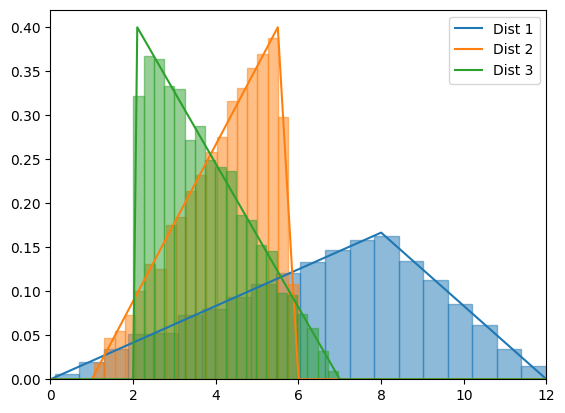

In [2]:
# Construct marginal distributions.
t1=A_GIS.Math.Distribution.Triangular.init(low=0,mode=8,high=12)
t2=A_GIS.Math.Distribution.Triangular.init(low=1,mode=5.5,high=6)
t3=A_GIS.Math.Distribution.Triangular.init(low=2,mode=2.1,high=7)
m = [t1,t2,t3]

# Construct correlation matrix.
c = A_GIS.Math.CorrelationMatrix.init(size=3,values=[0.1,-0.1,0.1])

# Get realizations.
nr=10000
r = A_GIS.Math.Distribution.sample(marginals=m,correlation=c,size=nr)

# Plot realizations.
ax = A_GIS.Math.Distribution.plot(distributions=m,realizations=r)

In [3]:
import numpy
cs=A_GIS.Math.CorrelationMatrix.from_samples(realizations=r)
print('original:',numpy.round(c.values,2))
print('sampled:',numpy.round(cs.values,2))

original: [ 0.1 -0.1  0.1]
sampled: [ 0.1  -0.09  0.12]


In [4]:
v = numpy.var(r,axis=0)
ck = [0.8,0.8,0.8]
weights = A_GIS.Math.Distribution.Mixture.Weights.get(correlation_matrix=c,variances=v,multipliers=ck)
print("variances",v)
print("ck",ck)
print("weights",weights)
x,y = A_GIS.Math.Distribution.Mixture.get(distributions=m,weights=weights,bins=1000)

import matplotlib.pyplot as plt
ax = A_GIS.Math.Distribution.plot(distributions=m)
ax.fill(x,y,'k')
plt.show()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/ww5/a-gis/venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/ww5/a-gis/venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/ww5/a-gis/venv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/Users/ww5/a-g

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

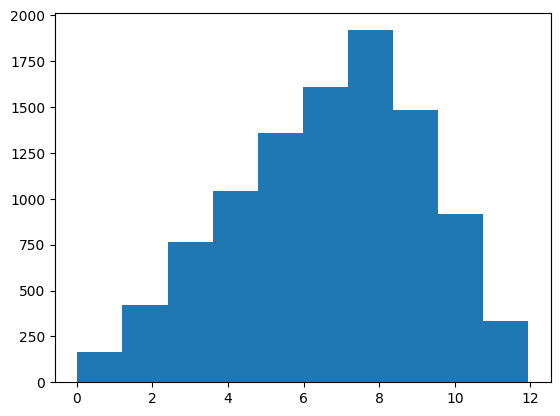

In [21]:
import matplotlib.pyplot as plt
a=t1.sample(10000)
plt.hist(a)
plt.show()

In [49]:
import numpy as np
x=0.3
b=np.exp(-a*x)

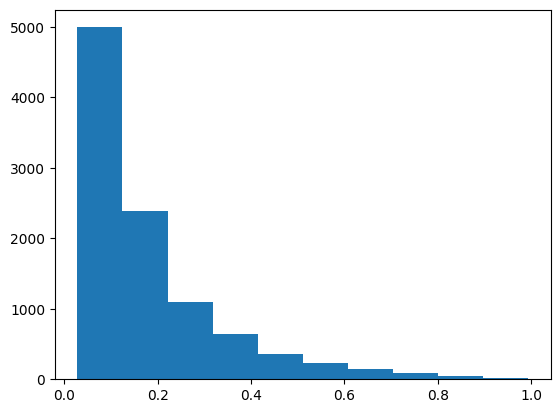

In [50]:
plt.hist(b)
plt.show()

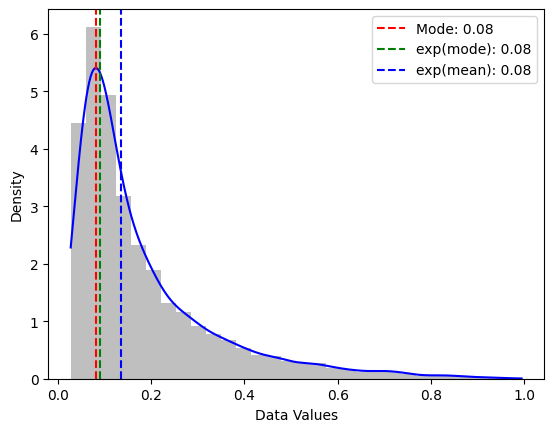

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Reshape data for sklearn
data = b[:, np.newaxis]

# Bandwidth selection using Scott's Rule
bandwidth = 1.06 * data.std() * len(data) ** (-1 / 5.)

# Fit KDE model
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data)

# Evaluate density on a grid
x_eval = np.linspace(data.min(), data.max(), 1000)[:, np.newaxis]
log_density = kde.score_samples(x_eval)

# Find mode
mode_index = np.argmax(log_density)
mode = x_eval[mode_index][0]

# Plot results
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray')
plt.plot(x_eval, np.exp(log_density), color='blue')
plt.axvline(mode, color='red', linestyle='--', label=f'Mode: {mode:.2f}')
plt.axvline(np.exp(-t1.mode*x), color='green', linestyle='--', label=f'exp(mode): {mode:.2f}')
t1_mean = (t1.mode+t1.low+t1.high)/3.
plt.axvline(np.exp(-t1_mean*x), color='blue', linestyle='--', label=f'exp(mean): {mode:.2f}')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.show()


0